
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> ‘ScheduledDay’ tells us on what day the patient set up their appointment .

> ‘Neighborhood’ indicates the location of the hospital.

> ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

### Question(s) for Analysis
> **What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?**

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.6MB/s eta 0:00:01   18% |█████▉                          | 1.9MB 5.1MB/s eta 0:00:02    23% |███████▍                        | 2.4MB 13.3MB/s eta 0:00:01    32% |██████████▎                     | 3.4MB 10.4MB/s eta 0:00:01    36% |███████████▉                    | 3.9MB 10.0MB/s eta 0:00:01    50% |████████████████▏               | 5.3MB 12.3MB/s eta 0:00:01    59% |███████████████████             | 6.2MB 11.2MB/s eta 0:00:01    67% |█████████████████████▊          | 7.1MB 10.4MB/s eta 0:00:01    73% |███████████████████████▌        | 7.7MB 12.3MB/s eta 0:00:01    82% |██████████████████████████▌     | 8.7MB 11.5MB/s eta 0:00:01    87% |███████████████████████████▉    | 9.1MB 6.2MB/s eta 0:00:01    91% |█████████████████████████████▍  | 9.6MB 11.8MB/s eta 0:00:01    97% |███████████████████████████████▏| 10.2MB 12.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.4MB/s ta 0:00:011  3% |█▏                         

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [2]:
# Loading our data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# indicating number of abserves and columns
df.shape

(110527, 14)

**We have 110527 observes and 14 columns.

In [5]:
# looking for any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**We don't have any missing data here
and data types don't have to be changed

In [6]:
# looking for any duplicated rows
df.duplicated().sum()

0

**we don't have any duplicated rows

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Mean age is 37 years.
max age 115 years..
and there is  a mistake in Age because the min is -1


### Data Cleaning


 After discussing the structure of the data and any problems that need to be cleaned.

In [8]:
# Drop unnessecary columns from our data
drop_col = ['PatientId','AppointmentID','ScheduledDay','AppointmentDay']
df.drop(drop_col,axis = 1,inplace= True)
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [9]:
# renaming the columns to make them low and replacing "-" with "_"
df.rename(columns=lambda x:x.lower().replace('-','_'),inplace= True)
df.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
#Drop wrong data 
wrong = df.query('age < 0 ')
df.drop(wrong.index,inplace=True)

In [11]:
#making sure that it's dropped
df.query('age < 0 ')

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [12]:
#reassigning no_show column to a new column "show" prevent missunderstand
df['show']=''
mask_1 = df.no_show=='No'
mask_2 = df.no_show=='Yes'
df.show.where(~mask_1,other='yes',inplace=True)
df.show.where(~mask_2,other='no',inplace=True)
df.drop('no_show',axis=1,inplace=True)
df.head(2)


,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,yes
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,yes


<a id='eda'></a>
## Exploratory Data Analysis



### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82d59faac8>,
      dtype=object)

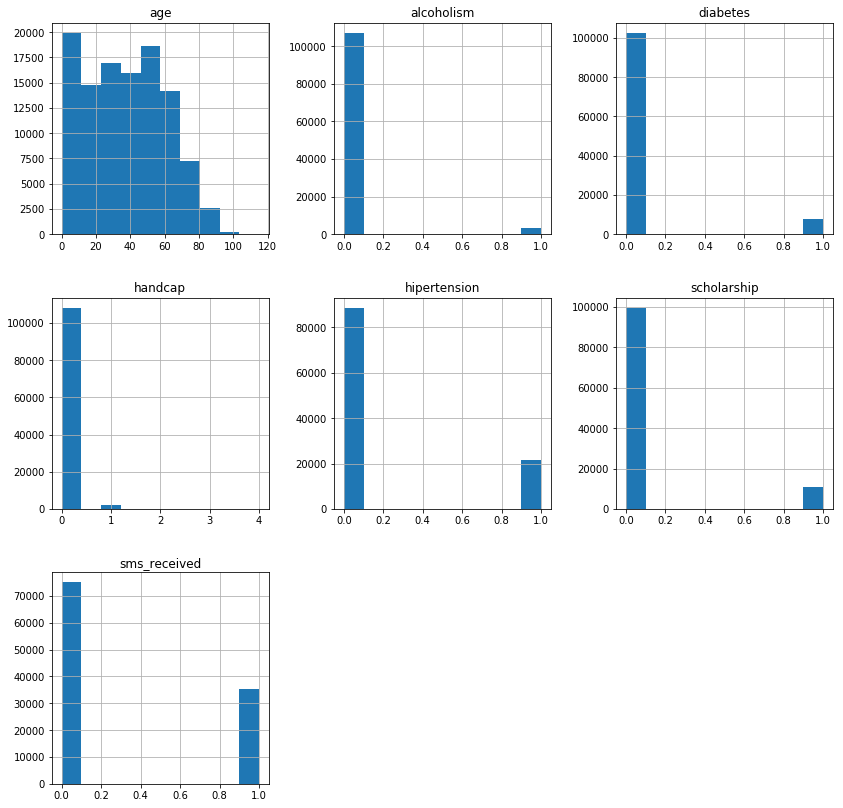

In [14]:
# making histograms for the whole data
df.hist(figsize=(14,14))

we found that:

Number of patient who didn't receive sms is about the half who recieved sms.

most of patients don't suffer from alcholism or handcap.

about 20% suffer from hypertension

about 10% are enrolled in welfare program

In [15]:
df.show.value_counts()

yes    88207
no     22319
Name: show, dtype: int64

the number of people who didn't show is about 1/4 who showed

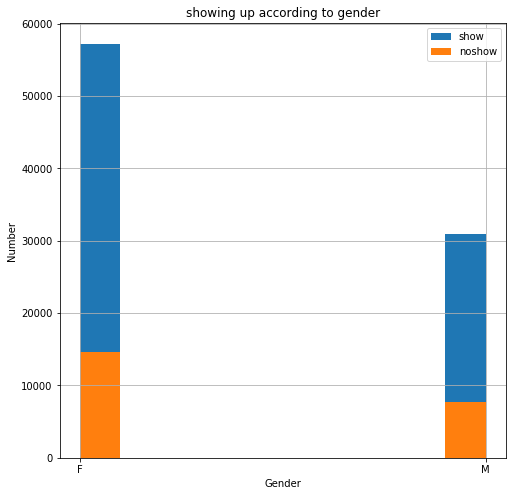

In [16]:
#comparison for showing up according to gender
#plotting histogram
showed = df.show == 'yes'
noshow = df.show == 'no'
plt.figure(figsize=(8,8))
df.gender[showed].hist(label = 'show')
df.gender[noshow].hist(label = 'noshow')
plt.legend()
plt.title('showing up according to gender')
plt.xlabel('Gender')
plt.ylabel('Number');

In [17]:
df.groupby('gender')['show'].value_counts()

gender  show
F       yes     57245
        no      14594
M       yes     30962
        no       7725
Name: show, dtype: int64

The gender is insignificant because it's almost the same proportion between who showed and who didn't in both male and female

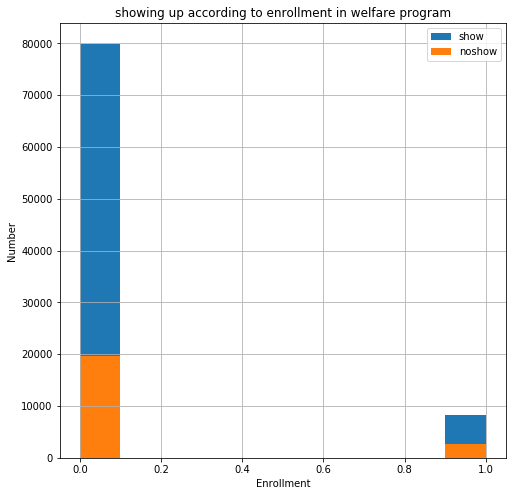

In [18]:
#comparison for showing up according to enrollment in welfare program
plt.figure(figsize=(8,8))
df.scholarship[showed].hist(label = 'show')
df.scholarship[noshow].hist(label = 'noshow')
plt.legend()
plt.title('showing up according to enrollment in welfare program')
plt.xlabel('Enrollment')
plt.ylabel('Number');

The enrollment in welfare program is insignificant

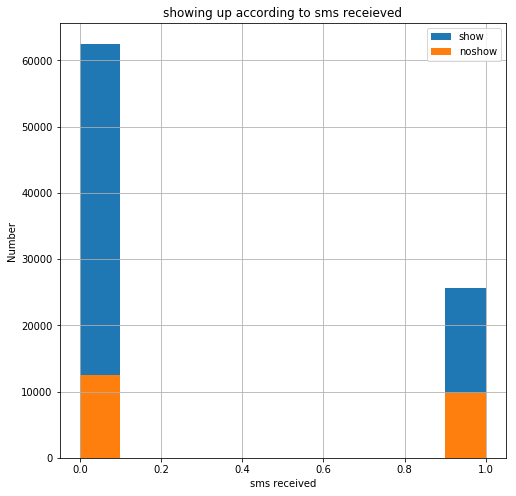

In [19]:
#comparison for showing up according to sms received
plt.figure(figsize=(8,8))
df.sms_received[showed].hist(label = 'show')
df.sms_received[noshow].hist(label = 'noshow')
plt.legend()
plt.title('showing up according to sms receieved')
plt.xlabel('sms received')
plt.ylabel('Number');

The people who showed up the most were who didn't receive sms!!!!
quite strange!!!

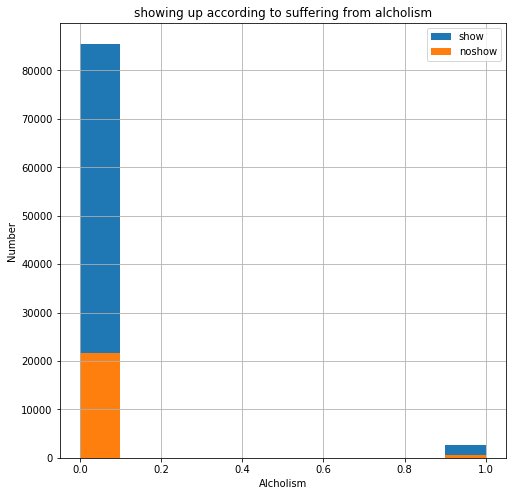

In [19]:
#comparison for showing up according to suffering from alcoholism
plt.figure(figsize=(8,8))
df.alcoholism[showed].hist(label = 'show')
df.alcoholism[noshow].hist(label = 'noshow')
plt.legend()
plt.title('showing up according to suffering from alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Number');

In [23]:
#showing the number of who showed up according to suffering from alcoholism
df_cleaned.groupby(by='alcoholism')['show'].value_counts() 

alcoholism  show
0           yes     85524
            no      21642
1           yes      2683
            no        677
Name: show, dtype: int64

suffering from alcoholism is insignificant

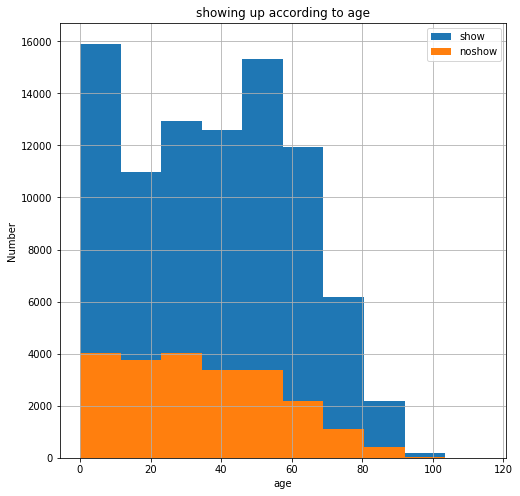

In [20]:
#comparison for showing up according to age
plt.figure(figsize=(8,8))
df.age[showed].hist(label = 'show')
df.age[noshow].hist(label = 'noshow')
plt.legend()
plt.title('showing up according to age')
plt.xlabel('age')
plt.ylabel('Number');

it seems like age from **`(0-10)`** and **`(45-68)`** have high potential to show up
 

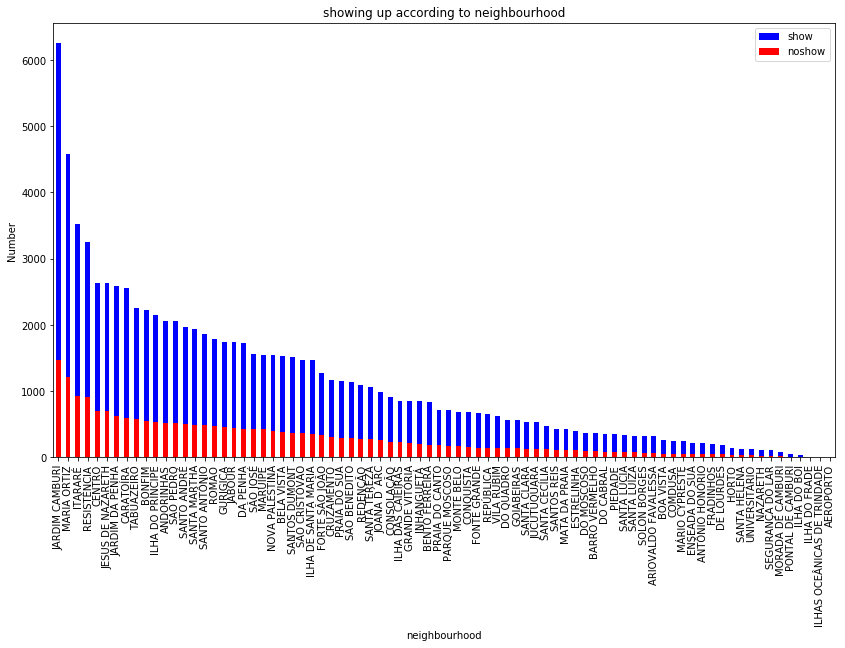

In [26]:
plt.figure(figsize=(14,8))
df.neighbourhood[showed].value_counts().plot(kind='bar',label = 'show',color='blue')
df.neighbourhood[noshow].value_counts().plot(kind='bar',label = 'noshow',color='red')
plt.legend()
plt.title('showing up according to neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('Number');

neighbourhood is highly coorelated with showing up 

`jardim camburi` neighbourhood has a high potential for showing up

<a id='conclusions'></a>
## Conclusions

- It seems that age and neighbourhood are strongly affecting showing up of the patient
- it's a strange thing that people who didn't get the sms showed up more

**limitations** in this project was that there are no corelation between showing up and many characteristics 

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])